#Premier League Betting Odds Models

 Maame Yaa Afaribea Martinson

The english premier league was founded in 1993.  The data from Kaggle includes all of the matches played from the start of the league.  The data includes the result of the match, the home and away team, the number of goals scored, the number of penalties scored and more.  The betting odds from Bet365, a sports betting company, are included starting in the 2002-2003 season.  The goal of our project is to build models that predict the betting odds.  This model can be used by a betting company looking to set the odds or by someone who wants to bet on the games.  If the odds from the model are much higher than what is currently set for the game it may be a good bet to make.

In [ ]:
#The first step is to import the data set and everything we need to start basic exploratory analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
PL = pd.read_csv('PremierLeague.csv')
PL.head()

,Season,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,...,MarketMaxHomeTeam,MarketMaxDraw,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals
0,1993-1994,14/08/93,NaN,Arsenal,Coventry,0,3,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-1994,14/08/93,NaN,Aston Villa,QPR,4,1,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-1994,14/08/93,NaN,Chelsea,Blackburn,1,2,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-1994,14/08/93,NaN,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-1994,14/08/93,NaN,Man City,Leeds,1,1,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(PL)

11683

A little bit of cleaning before going forward. Renaming one column with a typo in the title to avoid future mistakes and removing bet-related columns we're not using

In [ ]:
PL = PL.rename(columns={'AwayTeamReadCards': 'AwayTeamRedCards'})

In [ ]:
PL = PL.loc[:,~PL.columns.str.startswith('Market')]

In [ ]:
PL.dtypes

Season                    object
Date                      object
Time                      object
HomeTeam                  object
AwayTeam                  object
FullTimeHomeTeamGoals      int64
FullTimeAwayTeamGoals      int64
FullTimeResult            object
HalfTimeHomeTeamGoals    float64
HalfTimeAwayTeamGoals    float64
HalfTimeResult            object
Referee                   object
HomeTeamShots            float64
AwayTeamShots            float64
HomeTeamShotsOnTarget    float64
AwayTeamShotsOnTarget    float64
HomeTeamCorners          float64
AwayTeamCorners          float64
HomeTeamFouls            float64
AwayTeamFouls            float64
HomeTeamYellowCards      float64
AwayTeamYellowCards      float64
HomeTeamRedCards         float64
AwayTeamRedCards         float64
B365HomeTeam             float64
B365Draw                 float64
B365AwayTeam             float64
B365Over2.5Goals         float64
B365Under2.5Goals        float64
dtype: object

In [ ]:
PL.isnull().sum()

Season                      0
Date                        0
Time                     9880
HomeTeam                    0
AwayTeam                    0
FullTimeHomeTeamGoals       0
FullTimeAwayTeamGoals       0
FullTimeResult              0
HalfTimeHomeTeamGoals     760
HalfTimeAwayTeamGoals     760
HalfTimeResult            760
Referee                  2660
HomeTeamShots            2660
AwayTeamShots            2660
HomeTeamShotsOnTarget    2660
AwayTeamShotsOnTarget    2660
HomeTeamCorners          2660
AwayTeamCorners          2660
HomeTeamFouls            2660
AwayTeamFouls            2660
HomeTeamYellowCards      2660
AwayTeamYellowCards      2660
HomeTeamRedCards         2660
AwayTeamRedCards         2660
B365HomeTeam             3420
B365Draw                 3420
B365AwayTeam             3420
B365Over2.5Goals         8877
B365Under2.5Goals        8877
dtype: int64

Below we are creating new features so that we have features that can be used for future predictions.   We are using the average of the last 10 games to create these features. We are doing this for goals, shots, corners, yellow cards, red cards, and fouls.  We are also creating a column that calculates the win percentage from the last 10 games.

In [ ]:
def last_ten_avg(column):
  rolling_avg_H = grouped[column].rolling(window=10, min_periods=1, closed='left').mean() #closed=left excludes the last row (i.e. only past games get averaged)
  rolling_avg_H = rolling_avg_H.reset_index(level=0, drop=True)
  colname = column + 'Last10Avg'
  PL[colname] = rolling_avg_H

In [ ]:
grouped = PL.groupby('HomeTeam')
last_ten_avg('FullTimeHomeTeamGoals')
last_ten_avg('HomeTeamShots')
last_ten_avg('HomeTeamCorners')
last_ten_avg('HomeTeamFouls')
last_ten_avg('HomeTeamYellowCards')
last_ten_avg('HomeTeamRedCards')

In [ ]:
grouped = PL.groupby('AwayTeam')
last_ten_avg('FullTimeAwayTeamGoals')
last_ten_avg('AwayTeamShots')
last_ten_avg('AwayTeamCorners')
last_ten_avg('AwayTeamFouls')
last_ten_avg('AwayTeamYellowCards')
last_ten_avg('AwayTeamRedCards')

In [ ]:
win_percent_df = pd.DataFrame()
for result in ['H', 'A', 'D']:
    win_counts = (PL['FullTimeResult'] == result).rolling(window=10, min_periods=1, closed='left').sum()
    win_percent = (win_counts / 10) * 100
    win_percent_df['WinPercent_{result}'] = win_percent
PL2 = pd.concat([PL, win_percent_df], axis=1)

In [ ]:
PL2.head(-1000)

,Season,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,...,HomeTeamRedCardsLast10Avg,FullTimeAwayTeamGoalsLast10Avg,AwayTeamShotsLast10Avg,AwayTeamCornersLast10Avg,AwayTeamFoulsLast10Avg,AwayTeamYellowCardsLast10Avg,AwayTeamRedCardsLast10Avg,WinPercent_H,WinPercent_A,WinPercent_D
0,1993-1994,14/08/93,NaN,Arsenal,Coventry,0,3,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.0,0.0
1,1993-1994,14/08/93,NaN,Aston Villa,QPR,4,1,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,0.0
2,1993-1994,14/08/93,NaN,Chelsea,Blackburn,1,2,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,20.0,0.0
3,1993-1994,14/08/93,NaN,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,0.0
4,1993-1994,14/08/93,NaN,Man City,Leeds,1,1,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2021-2022,12/09/21,16:30:00,Leeds,Liverpool,0,3,A,0.0,1.0,...,0.0,2.3,17.2,6.7,10.5,0.6,0.0,40.0,50.0,10.0
10679,2021-2022,13/09/21,20:00:00,Everton,Burnley,3,1,H,0.0,0.0,...,0.0,1.4,10.5,4.6,9.3,1.0,0.0,50.0,40.0,10.0
10680,2021-2022,17/09/21,20:00:00,Newcastle,Leeds,1,1,D,1.0,1.0,...,0.2,1.4,12.3,6.1,10.7,1.6,0.1,40.0,40.0,20.0
10681,2021-2022,18/09/21,12:30:00,Wolves,Brentford,0,2,A,0.0,2.0,...,0.0,0.5,11.5,3.5,11.5,2.0,0.0,30.0,50.0,20.0


In [ ]:
PL2.dtypes

Season                             object
Date                               object
Time                               object
HomeTeam                           object
AwayTeam                           object
FullTimeHomeTeamGoals               int64
FullTimeAwayTeamGoals               int64
FullTimeResult                     object
HalfTimeHomeTeamGoals             float64
HalfTimeAwayTeamGoals             float64
HalfTimeResult                     object
Referee                            object
HomeTeamShots                     float64
AwayTeamShots                     float64
HomeTeamShotsOnTarget             float64
AwayTeamShotsOnTarget             float64
HomeTeamCorners                   float64
AwayTeamCorners                   float64
HomeTeamFouls                     float64
AwayTeamFouls                     float64
HomeTeamYellowCards               float64
AwayTeamYellowCards               float64
HomeTeamRedCards                  float64
AwayTeamRedCards                  

After checking that none of the values need to be changed check for null values.

In [ ]:
PL2.isnull().sum()

Season                               0
Date                                 0
Time                              9880
HomeTeam                             0
AwayTeam                             0
FullTimeHomeTeamGoals                0
FullTimeAwayTeamGoals                0
FullTimeResult                       0
HalfTimeHomeTeamGoals              760
HalfTimeAwayTeamGoals              760
HalfTimeResult                     760
Referee                           2660
HomeTeamShots                     2660
AwayTeamShots                     2660
HomeTeamShotsOnTarget             2660
AwayTeamShotsOnTarget             2660
HomeTeamCorners                   2660
AwayTeamCorners                   2660
HomeTeamFouls                     2660
AwayTeamFouls                     2660
HomeTeamYellowCards               2660
AwayTeamYellowCards               2660
HomeTeamRedCards                  2660
AwayTeamRedCards                  2660
B365HomeTeam                      3420
B365Draw                 

We can check the distribution of the new features and their correlations below.

<Axes: xlabel='FullTimeHomeTeamGoalsLast10Avg', ylabel='Count'>

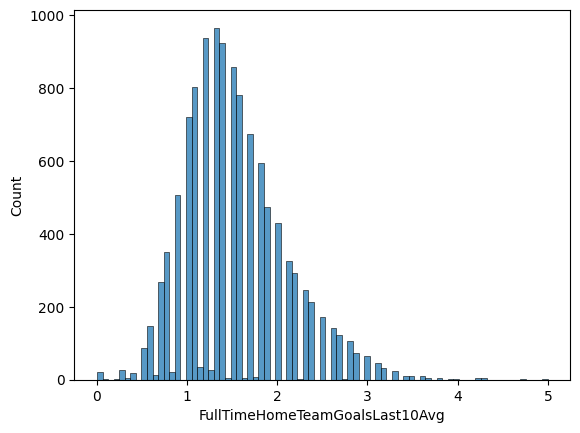

In [ ]:
sns.histplot(data = PL, x='FullTimeHomeTeamGoalsLast10Avg')

<Axes: xlabel='FullTimeAwayTeamGoalsLast10Avg', ylabel='Count'>

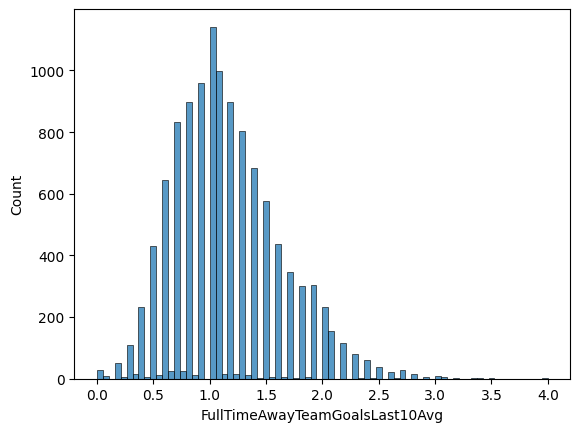

In [ ]:
sns.histplot(data = PL, x='FullTimeAwayTeamGoalsLast10Avg')

<Axes: xlabel='HomeTeamShotsLast10Avg', ylabel='Count'>

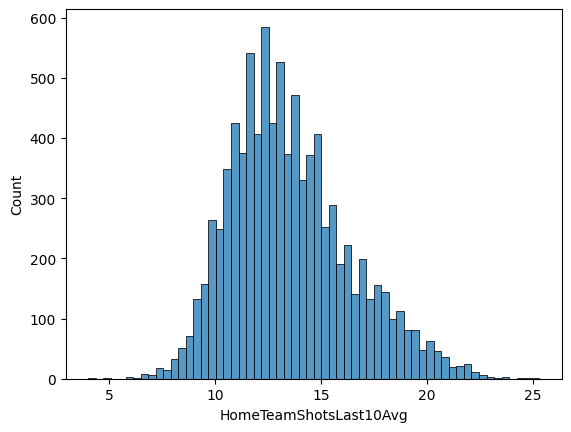

In [ ]:
sns.histplot(data = PL, x='HomeTeamShotsLast10Avg')

<Axes: xlabel='AwayTeamShotsLast10Avg', ylabel='Count'>

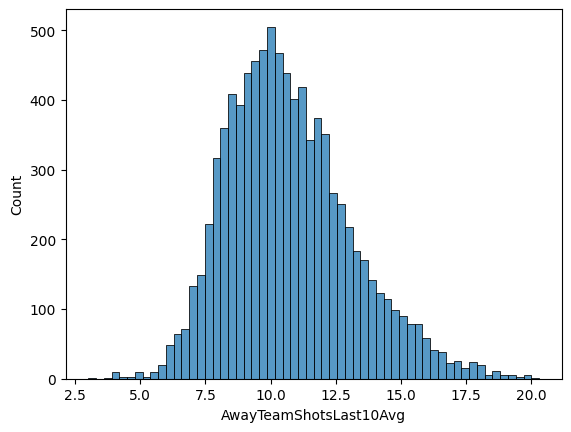

In [ ]:
sns.histplot(data = PL, x='AwayTeamShotsLast10Avg')

<Axes: xlabel='HomeTeamCornersLast10Avg', ylabel='Count'>

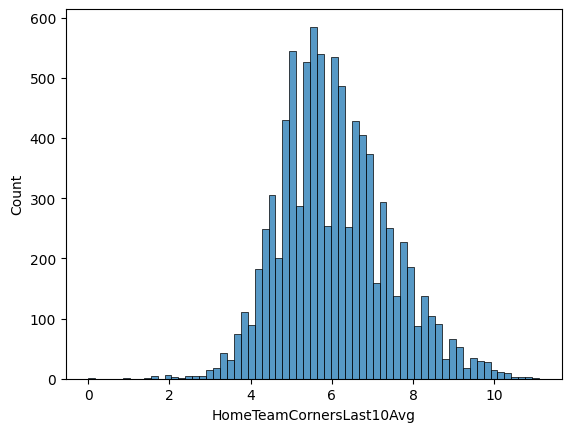

In [ ]:
sns.histplot(data = PL, x='HomeTeamCornersLast10Avg')

<Axes: xlabel='AwayTeamCornersLast10Avg', ylabel='Count'>

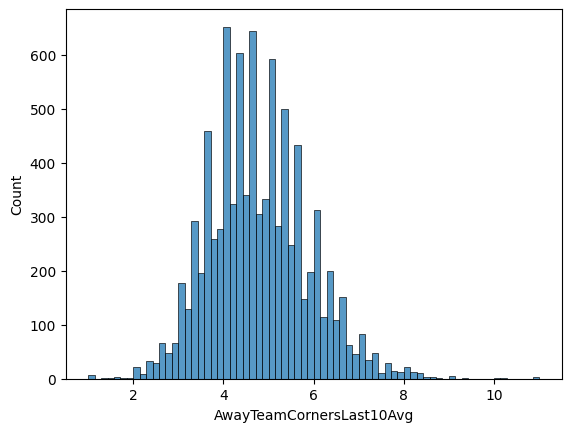

In [ ]:
sns.histplot(data = PL, x='AwayTeamCornersLast10Avg')

In [ ]:
new_features_numerical_columns_BET365  = PL2[['B365HomeTeam','B365Draw','B365AwayTeam','B365Over2.5Goals','B365Under2.5Goals','AwayTeamYellowCardsLast10Avg','HomeTeamYellowCardsLast10Avg','HomeTeamRedCardsLast10Avg','AwayTeamRedCardsLast10Avg','HomeTeamFoulsLast10Avg','AwayTeamFoulsLast10Avg','HomeTeamCornersLast10Avg','AwayTeamCornersLast10Avg','AwayTeamShotsLast10Avg','HomeTeamShotsLast10Avg','FullTimeAwayTeamGoalsLast10Avg','FullTimeHomeTeamGoalsLast10Avg','WinPercent_H','WinPercent_A','WinPercent_D']]

In [ ]:
new_features_numerical_columns_BET365.corr().round(2)

,B365HomeTeam,B365Draw,B365AwayTeam,B365Over2.5Goals,B365Under2.5Goals,AwayTeamYellowCardsLast10Avg,HomeTeamYellowCardsLast10Avg,HomeTeamRedCardsLast10Avg,AwayTeamRedCardsLast10Avg,HomeTeamFoulsLast10Avg,AwayTeamFoulsLast10Avg,HomeTeamCornersLast10Avg,AwayTeamCornersLast10Avg,AwayTeamShotsLast10Avg,HomeTeamShotsLast10Avg,FullTimeAwayTeamGoalsLast10Avg,FullTimeHomeTeamGoalsLast10Avg,WinPercent_H,WinPercent_A,WinPercent_D
B365HomeTeam,1.00,0.02,-0.49,-0.12,0.11,-0.04,0.14,0.02,-0.03,0.05,-0.20,-0.26,0.40,0.54,-0.30,0.50,-0.32,-0.07,0.10,-0.03
B365Draw,0.02,1.00,0.81,-0.68,0.82,0.00,-0.08,-0.07,-0.04,-0.25,-0.13,0.28,-0.04,0.03,0.46,-0.02,0.47,0.03,0.01,-0.05
B365AwayTeam,-0.49,0.81,1.00,-0.40,0.52,0.02,-0.18,-0.08,0.00,-0.20,0.07,0.39,-0.25,-0.31,0.53,-0.33,0.55,0.07,-0.06,-0.02
B365Over2.5Goals,-0.12,-0.68,-0.40,1.00,-0.90,-0.12,-0.06,0.01,0.09,0.25,0.21,-0.25,-0.13,-0.30,-0.45,-0.26,-0.49,-0.02,-0.04,0.07
B365Under2.5Goals,0.11,0.82,0.52,-0.90,1.00,0.12,0.06,-0.03,-0.10,-0.30,-0.24,0.24,0.08,0.27,0.47,0.20,0.49,0.02,0.05,-0.08
AwayTeamYellowCardsLast10Avg,-0.04,0.00,0.02,-0.12,0.12,1.00,0.07,0.03,0.09,0.01,0.30,0.00,-0.10,-0.07,0.03,-0.03,0.02,0.03,-0.01,-0.02
HomeTeamYellowCardsLast10Avg,0.14,-0.08,-0.18,-0.06,0.06,0.07,1.00,0.10,-0.03,0.23,-0.13,-0.19,-0.04,0.08,-0.16,0.04,-0.22,-0.01,0.05,-0.04
HomeTeamRedCardsLast10Avg,0.02,-0.07,-0.08,0.01,-0.03,0.03,0.10,1.00,0.03,0.18,0.05,-0.08,-0.00,-0.03,-0.14,-0.01,-0.12,-0.02,0.01,0.01
AwayTeamRedCardsLast10Avg,-0.03,-0.04,0.00,0.09,-0.10,0.09,-0.03,0.03,1.00,0.09,0.12,0.02,-0.02,-0.10,-0.00,-0.08,0.00,-0.01,-0.01,0.02
HomeTeamFoulsLast10Avg,0.05,-0.25,-0.20,0.25,-0.30,0.01,0.23,0.18,0.09,1.00,0.33,-0.07,-0.01,-0.18,-0.29,-0.07,-0.21,0.00,-0.04,0.04


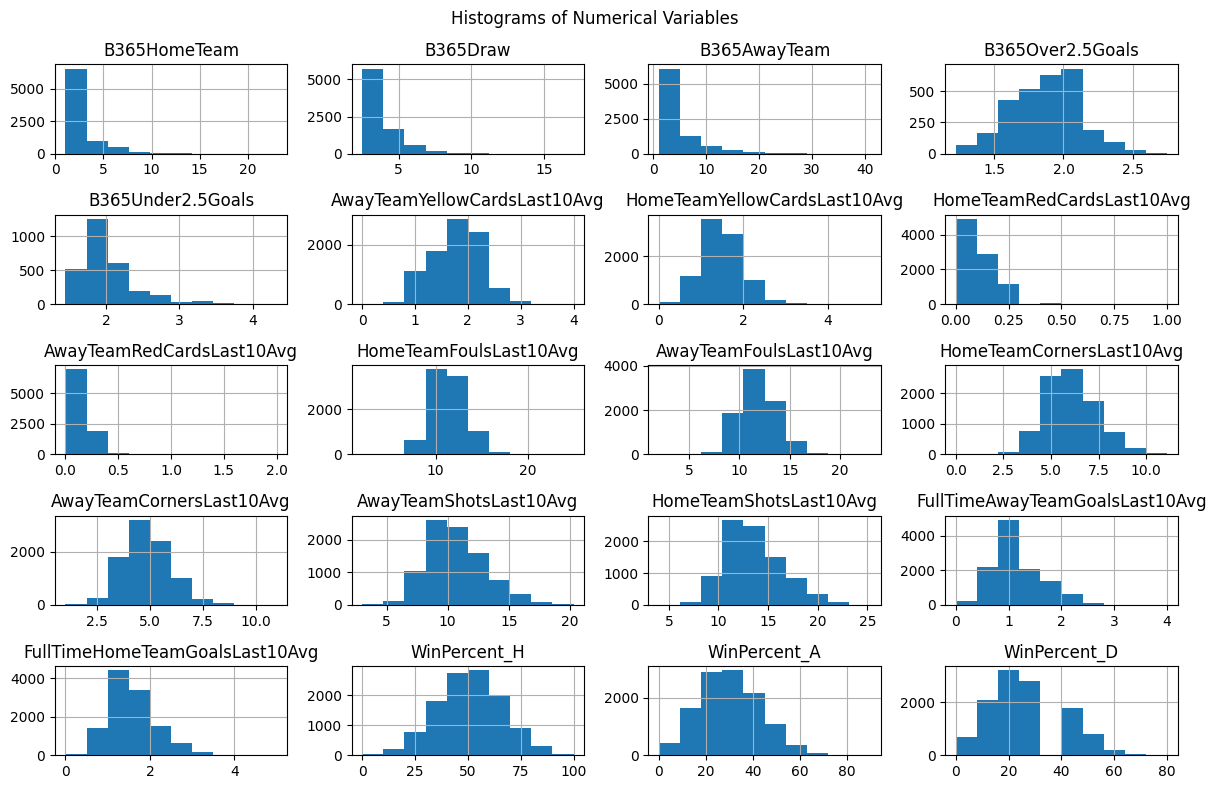

In [ ]:
new_features_numerical_columns_BET365.hist(figsize=(12, 8))
plt.suptitle("Histograms of Numerical Variables")
plt.tight_layout()
plt.show()

In [ ]:
PL_bet = PL2[(PL2["B365HomeTeam"].notnull()) & (PL2["B365Over2.5Goals"].notnull())]

In [ ]:
PL_bet.isnull().sum()

Season                               0
Date                                 0
Time                              1004
HomeTeam                             0
AwayTeam                             0
FullTimeHomeTeamGoals                0
FullTimeAwayTeamGoals                0
FullTimeResult                       0
HalfTimeHomeTeamGoals                0
HalfTimeAwayTeamGoals                0
HalfTimeResult                       0
Referee                              0
HomeTeamShots                        0
AwayTeamShots                        0
HomeTeamShotsOnTarget                0
AwayTeamShotsOnTarget                0
HomeTeamCorners                      0
AwayTeamCorners                      0
HomeTeamFouls                        0
AwayTeamFouls                        0
HomeTeamYellowCards                  0
AwayTeamYellowCards                  0
HomeTeamRedCards                     0
AwayTeamRedCards                     0
B365HomeTeam                         0
B365Draw                 

In [ ]:
PL_bet.head(100)

,Season,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,...,HomeTeamRedCardsLast10Avg,FullTimeAwayTeamGoalsLast10Avg,AwayTeamShotsLast10Avg,AwayTeamCornersLast10Avg,AwayTeamFoulsLast10Avg,AwayTeamYellowCardsLast10Avg,AwayTeamRedCardsLast10Avg,WinPercent_H,WinPercent_A,WinPercent_D
3549,2002-2003,16/11/02,NaN,Arsenal,Tottenham,3,0,H,1.0,0.0,...,0.0,1.1,8.7,5.3,13.2,1.8,0.0,70.0,10.0,20.0
3550,2002-2003,16/11/02,NaN,Chelsea,Middlesbrough,1,0,H,0.0,0.0,...,0.0,0.6,9.6,5.6,13.1,1.3,0.1,70.0,10.0,20.0
3551,2002-2003,16/11/02,NaN,Man City,Charlton,0,1,A,0.0,0.0,...,0.3,0.5,8.5,5.7,12.1,1.6,0.0,70.0,20.0,10.0
3552,2002-2003,16/11/02,NaN,Newcastle,Southampton,2,1,H,1.0,1.0,...,0.0,0.7,10.3,5.0,12.7,1.2,0.2,70.0,20.0,10.0
3553,2002-2003,16/11/02,NaN,West Brom,Aston Villa,0,0,D,0.0,0.0,...,0.0,0.9,12.2,5.9,13.6,1.2,0.0,60.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,2002-2003,11/01/03,NaN,West Ham,Newcastle,2,2,D,2.0,1.0,...,0.1,1.4,9.8,5.2,12.4,1.5,0.1,40.0,10.0,50.0
3645,2002-2003,12/01/03,NaN,Birmingham,Arsenal,0,4,A,0.0,2.0,...,0.1,1.7,8.5,5.4,13.9,2.1,0.2,30.0,20.0,50.0
3646,2002-2003,12/01/03,NaN,Tottenham,Everton,4,3,H,1.0,1.0,...,0.1,0.8,10.5,5.1,16.7,1.6,0.3,30.0,20.0,50.0
3647,2002-2003,18/01/03,NaN,Aston Villa,Tottenham,0,1,A,0.0,0.0,...,0.2,1.0,8.7,4.9,11.7,1.5,0.2,30.0,30.0,40.0


In [ ]:
PL_bet.dtypes

Season                             object
Date                               object
Time                               object
HomeTeam                           object
AwayTeam                           object
FullTimeHomeTeamGoals               int64
FullTimeAwayTeamGoals               int64
FullTimeResult                     object
HalfTimeHomeTeamGoals             float64
HalfTimeAwayTeamGoals             float64
HalfTimeResult                     object
Referee                            object
HomeTeamShots                     float64
AwayTeamShots                     float64
HomeTeamShotsOnTarget             float64
AwayTeamShotsOnTarget             float64
HomeTeamCorners                   float64
AwayTeamCorners                   float64
HomeTeamFouls                     float64
AwayTeamFouls                     float64
HomeTeamYellowCards               float64
AwayTeamYellowCards               float64
HomeTeamRedCards                  float64
AwayTeamRedCards                  

We can replace the null values with 0.

In [ ]:
PL_bet[['AwayTeamYellowCardsLast10Avg','HomeTeamYellowCardsLast10Avg','HomeTeamRedCardsLast10Avg','AwayTeamRedCardsLast10Avg','HomeTeamFoulsLast10Avg','AwayTeamFoulsLast10Avg','HomeTeamCornersLast10Avg','AwayTeamCornersLast10Avg','AwayTeamShotsLast10Avg','HomeTeamShotsLast10Avg','FullTimeAwayTeamGoalsLast10Avg','FullTimeHomeTeamGoalsLast10Avg']]=PL_bet[['AwayTeamYellowCardsLast10Avg','HomeTeamYellowCardsLast10Avg','HomeTeamRedCardsLast10Avg','AwayTeamRedCardsLast10Avg','HomeTeamFoulsLast10Avg','AwayTeamFoulsLast10Avg','HomeTeamCornersLast10Avg','AwayTeamCornersLast10Avg','AwayTeamShotsLast10Avg','HomeTeamShotsLast10Avg','FullTimeAwayTeamGoalsLast10Avg','FullTimeHomeTeamGoalsLast10Avg']].fillna(0)

<ipython-input-28-c18107a7c822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PL_bet[['AwayTeamYellowCardsLast10Avg','HomeTeamYellowCardsLast10Avg','HomeTeamRedCardsLast10Avg','AwayTeamRedCardsLast10Avg','HomeTeamFoulsLast10Avg','AwayTeamFoulsLast10Avg','HomeTeamCornersLast10Avg','AwayTeamCornersLast10Avg','AwayTeamShotsLast10Avg','HomeTeamShotsLast10Avg','FullTimeAwayTeamGoalsLast10Avg','FullTimeHomeTeamGoalsLast10Avg']]=PL_bet[['AwayTeamYellowCardsLast10Avg','HomeTeamYellowCardsLast10Avg','HomeTeamRedCardsLast10Avg','AwayTeamRedCardsLast10Avg','HomeTeamFoulsLast10Avg','AwayTeamFoulsLast10Avg','HomeTeamCornersLast10Avg','AwayTeamCornersLast10Avg','AwayTeamShotsLast10Avg','HomeTeamShotsLast10Avg','FullTimeAwayTeamGoalsLast10Avg','FullTimeHomeT

In [ ]:
PL_model  = PL_bet[['B365HomeTeam','B365Draw','B365AwayTeam','B365Over2.5Goals','B365Under2.5Goals','AwayTeamYellowCardsLast10Avg','HomeTeamYellowCardsLast10Avg','HomeTeamRedCardsLast10Avg','AwayTeamRedCardsLast10Avg','HomeTeamFoulsLast10Avg','AwayTeamFoulsLast10Avg','HomeTeamCornersLast10Avg','AwayTeamCornersLast10Avg','AwayTeamShotsLast10Avg','HomeTeamShotsLast10Avg','FullTimeAwayTeamGoalsLast10Avg','FullTimeHomeTeamGoalsLast10Avg','WinPercent_H','WinPercent_A','WinPercent_D']]

In [ ]:
#A small constant is added in order to be able to use log to transform the features.
#This allows us to get rid of any 0 values in the data frame.
small_const = 1e-9
lg_data = np.log(PL_model+small_const)

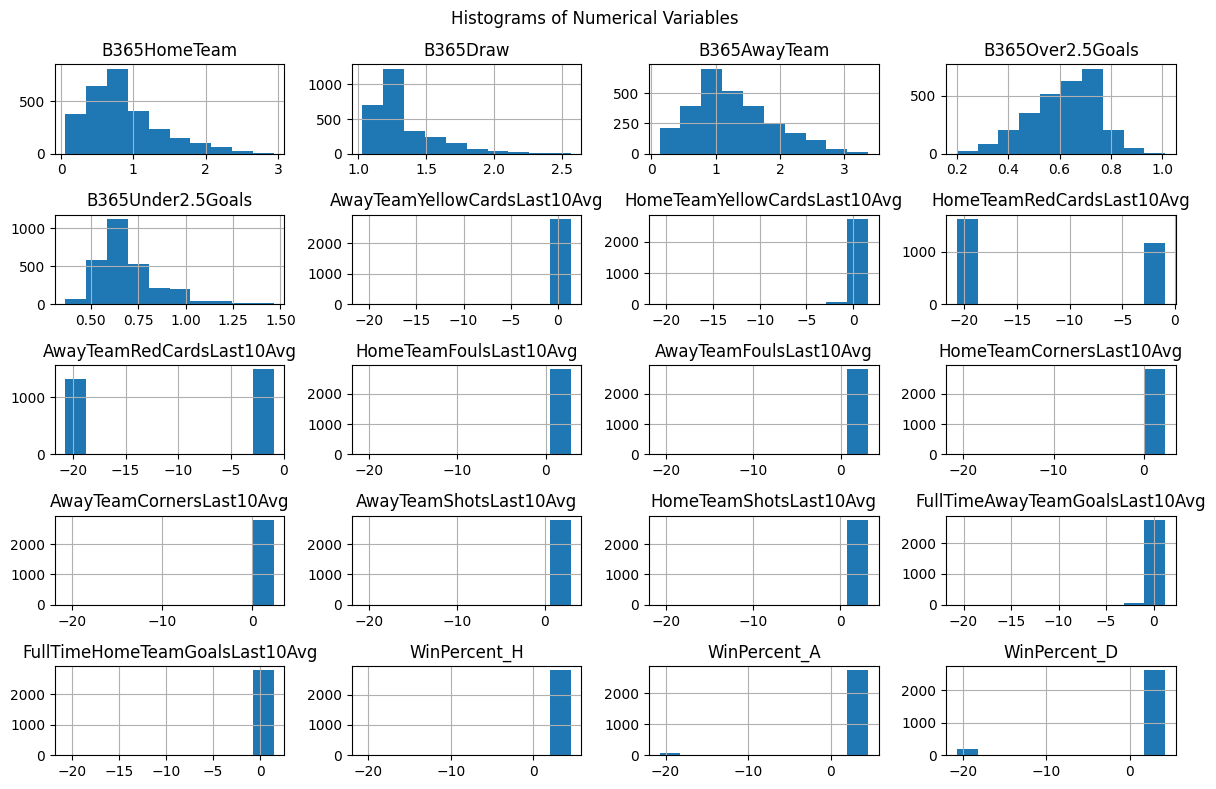

In [ ]:
#the log transformed data looks worse not sure if we need to do it individually.
lg_data.hist(figsize=(12, 8))
plt.suptitle("Histograms of Numerical Variables")
plt.tight_layout()
plt.show()

The non transformed data was used because the transformed data does not appear to be significantly changed.

Importing sklearn libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer

Test KNN, Linear Regression and Random Forrest models for predicting B365HomeTeam odds.

In [ ]:
X = PL_model.drop(columns=['B365HomeTeam'])
y = PL_model['B365HomeTeam']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#use cross validation to select best model then train and test that model.
cvdata = KFold(n_splits=5, random_state=42,shuffle=True)

In [ ]:
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))

In [ ]:
#find the optimal K and highest r2
Rsquared = []
for k in range(1,100):
    knn_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    scores = cross_val_score(knn_pipeline, X, y, cv=cvdata, scoring='r2')
    Rsquared.append(scores.mean())
print(max(Rsquared))
print(range(1,100)[np.argmax(Rsquared)])

0.7389883276302011
8


In [ ]:
#Linear Regression Model and r2
linearReg_pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores = cross_val_score(linearReg_pipeline, X, y, cv=cvdata)
scores.mean()

0.8194723458367376

In [ ]:
#create randomforest model
my_pipeline = Pipeline([
    ('preprocessor', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=42))
])


In [ ]:
#run cross validation for random forest model
scores = cross_val_score(my_pipeline, X, y, cv=cvdata)
scores.mean()

0.9840909176475948

###The Random Forest model has the highest R2 so if we want the best model we should use this model to fit the data and run predictions. But the linear model is close and is much faster.  We will fit the random forest model below, but later we will use all the linear models.

In [ ]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', SimpleImputer()), ('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

In [ ]:
y_pred = my_pipeline.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.05680817833665481


Test KNN, Linear Regression and Random Forrest models for predicting B365 Away odds.

In [ ]:
X1 = PL_model.drop(columns=['B365AwayTeam'])
y1 = PL_model['B365AwayTeam']

In [ ]:
Rsquared = []
for k in range(1,100):
    knn_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    scores = cross_val_score(knn_pipeline, X1, y1, cv=cvdata, scoring='r2')
    Rsquared.append(scores.mean())
print(max(Rsquared))
print(range(1,100)[np.argmax(Rsquared)])

0.8420247956060495
10


In [ ]:
linearReg_pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores = cross_val_score(linearReg_pipeline, X1, y1, cv=cvdata)
scores.mean()

0.9330739511719524

In [ ]:
scores = cross_val_score(my_pipeline, X1, y1, cv=cvdata)
scores.mean()

0.9777733751771676

Test KNN, Linear Regression and Random Forrest models for predicting B365 Draw odds.

In [ ]:
X2 = PL_model.drop(columns=['B365Draw'])
y2 = PL_model['B365Draw']

In [ ]:
Rsquared = []
for k in range(1,100):
    knn_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    scores = cross_val_score(knn_pipeline, X2, y2, cv=cvdata, scoring='r2')
    Rsquared.append(scores.mean())
print(max(Rsquared))
print(range(1,100)[np.argmax(Rsquared)])

0.8919130297226582
9


In [ ]:
linearReg_pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores = cross_val_score(linearReg_pipeline, X2, y2, cv=cvdata)
scores.mean()

0.9425898749465167

In [ ]:
scores = cross_val_score(my_pipeline, X2, y2, cv=cvdata)
scores.mean()

0.9725057372457593

Test KNN, Linear Regression and Random Forrest models for predicting B365 Over 2.5 odds.

In [ ]:
X3 = PL_model.drop(columns=['B365Over2.5Goals'])
y3 = PL_model['B365Over2.5Goals']

In [ ]:
Rsquared = []
for k in range(1,100):
    knn_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    scores = cross_val_score(knn_pipeline, X3, y3, cv=cvdata, scoring='r2')
    Rsquared.append(scores.mean())
print(max(Rsquared))
print(range(1,100)[np.argmax(Rsquared)])

0.7309427239528172
13


In [ ]:
linearReg_pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores = cross_val_score(linearReg_pipeline, X3, y3, cv=cvdata)
scores.mean()

0.8321089138738363

In [ ]:
scores = cross_val_score(my_pipeline, X3, y3, cv=cvdata)
scores.mean()

0.9894640610499057

Test KNN, Linear Regression and Random Forest models for predicting B365 Under 2.5 odds.

In [ ]:
X4 = PL_model.drop(columns=['B365Under2.5Goals'])
y4 = PL_model['B365Under2.5Goals']

In [ ]:
Rsquared = []
for k in range(1,100):
    knn_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    scores = cross_val_score(knn_pipeline, X4, y4, cv=cvdata, scoring='r2')
    Rsquared.append(scores.mean())
print(max(Rsquared))
print(range(1,100)[np.argmax(Rsquared)])

0.8123395521589828
8


In [ ]:
linearReg_pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores = cross_val_score(linearReg_pipeline, X4, y4, cv=cvdata)
scores.mean()

0.905660525998384

In [ ]:
scores = cross_val_score(my_pipeline, X4, y4, cv=cvdata)
scores.mean()

0.9939268544630491

##Fit the linear regression models
As mentioned earlier we will use the linear models because they are close to as good as the random forest model and give us the ability to explain the effects that the features have on the outcome as well as being the faster models.

In [ ]:
model_h = LinearRegression()
model_a = LinearRegression()
model_d = LinearRegression()
model_o = LinearRegression()
model_u = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [ ]:
model_h.fit(X_train, y_train)
model_a.fit(X_train1, y_train1)
model_d.fit(X_train2, y_train2)
model_o.fit(X_train3, y_train3)
model_u.fit(X_train4, y_train4)

We can use the models and find the MSE for each model below.

In [ ]:
y_predh = model_h.predict(X_test)
y_preda = model_a.predict(X_test1)
y_predd = model_d.predict(X_test2)
y_predo = model_o.predict(X_test3)
y_predu = model_u.predict(X_test4)

In [ ]:
mseh = mean_squared_error(y_test, y_predh)
msea = mean_squared_error(y_test1, y_preda)
msed = mean_squared_error(y_test2, y_predd)
mseo = mean_squared_error(y_test3, y_predo)
mseu = mean_squared_error(y_test4, y_predu)
print("The MSE for the Home Odds is",mseh)
print("The MSE for the Away Odds is",msea)
print("The MSE for the Draw Odds is",msed)
print("The MSE for the Over 2.5 goals Odds is",mseo)
print("The MSE for the Under 2.5 goals Odds is",mseu)

#Conclusion
The models are good predictors of the odds and can be used to predict odds of future games. We decided to use linear regression models because they are faster and more explainable. The explainability of the models allow us to see what features are most important for increasing the odds that a team will win or over/under 2.5 goals are scored. These models could be used by people who want to bet on the games and are looking for the safest bets or they can be used by book makers to help them set the odds.